PIB,IPC,BalanzaPagos,Desemp1000,DeudaGobMill,DefSupPublMill,IngresosImpMill,ÍndConfianzaConsum,TasaInterés,ExportMill,ImportMill,CréditCasaMill,DeudaPrivMill,ConsumFinHogEmprMill,GastoFinGobMill,TasaAhorroHogr
11573.99,91.47,-117671.04,18253,7262900,35296.14,150488.6,1.28,5.05,294054.5,399990.9,7537894,7827.47,8397807,1969316,4.2
11635.41,92.26,-105110.74,18981,7031103,35052.95,178740.1,1.27,5.27,280765.4,375928.8,7699810,7971.70,8348104,1976127,3.8
11599.99,92.38,-113847.54,20767,7381095,34937.38,137987.5,1.23,4.98,264111.0,360878.5,7910438,8138.94,8365433,1991507,5.8
11628.45,92.09,-95437.89,23955,7377479,34832.00,137549.8,1.19,4.77,253741.3,348669.0,8120480,8285.26,8515893,2012752,3.3
11737.73,92.32,-112632.31,24701,7455008,-42716.38,140019.7,1.30,5.08,257146.6,357303.4,8286869,8467.24,8521365,2034244,5.4
11801.89,93.20,-124096.80,25391,7730278,-42554.46,160236.9,1.31,5.10,263954.7,373914.7,8450263,8618.08,8485413,2034902,5.3


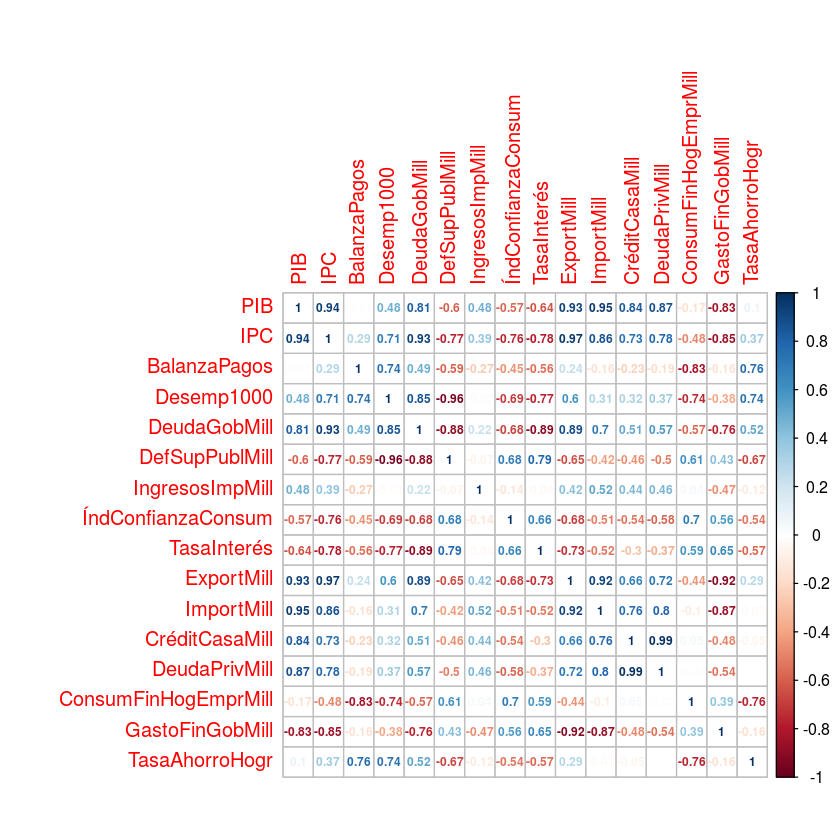

In [2]:
# Distancias entre Series temporales (económicas)

library(xts)
library(TSdist)
library(corrplot)

d <- read.csv("datos.csv")  # raw data

head(d)

dn <- apply(d, 2, function(x) x/max(abs(x)))  # data normalization
dates <- seq(as.Date("2001-03-01"), length = 48, by = "quarters")
vars <- xts(dn, order.by=dates)
cvars <- cor(vars)
corrplot(cvars, method="number", number.cex=0.6)

In [3]:
dcor<-TSDatabaseDistances(vars, distance='cor')
ddtw<-TSDatabaseDistances(vars, distance='dtw')
dccor<-TSDatabaseDistances(vars, distance='ccor')
deuc<-TSDatabaseDistances(vars, distance='euclidean')

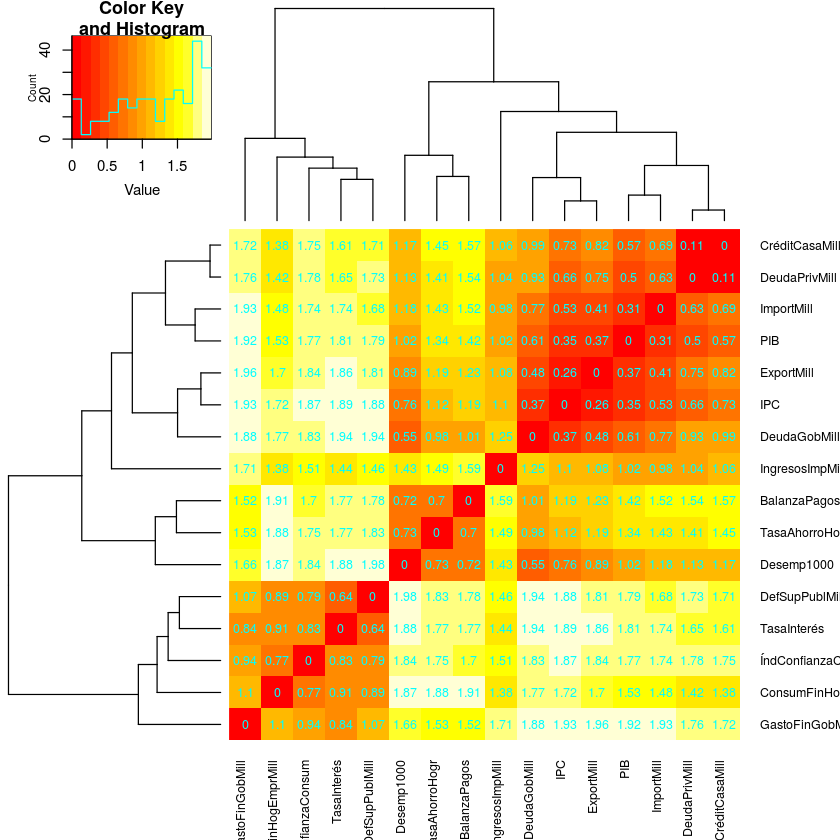

In [5]:
library(gplots)
m<-as.matrix(dcor); heatmap.2(m, cellnote=round(m, digits=2), 
                              trace='none', notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

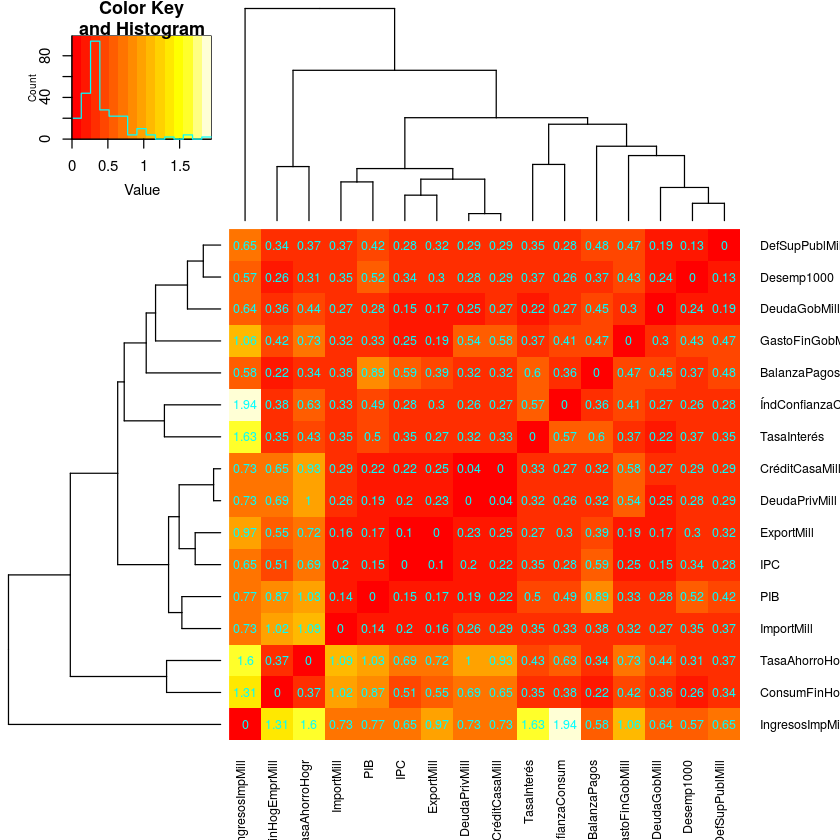

In [6]:
m<-as.matrix(dccor); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                               notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

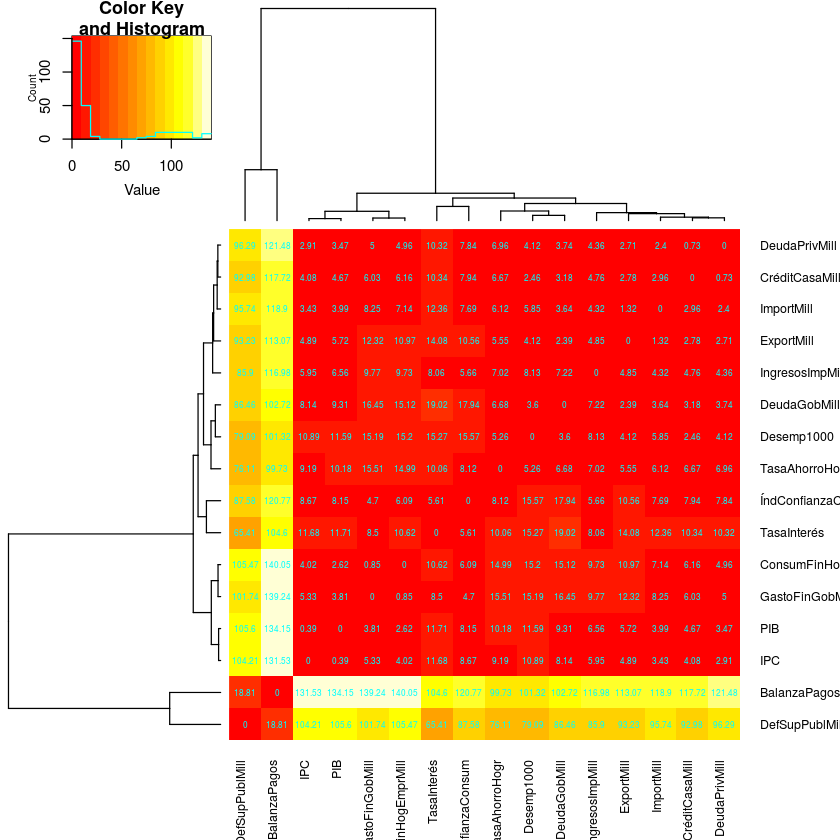

In [7]:
m<-as.matrix(ddtw); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                              notecex = 0.5, cexRow = 0.75, cexCol = 0.75)

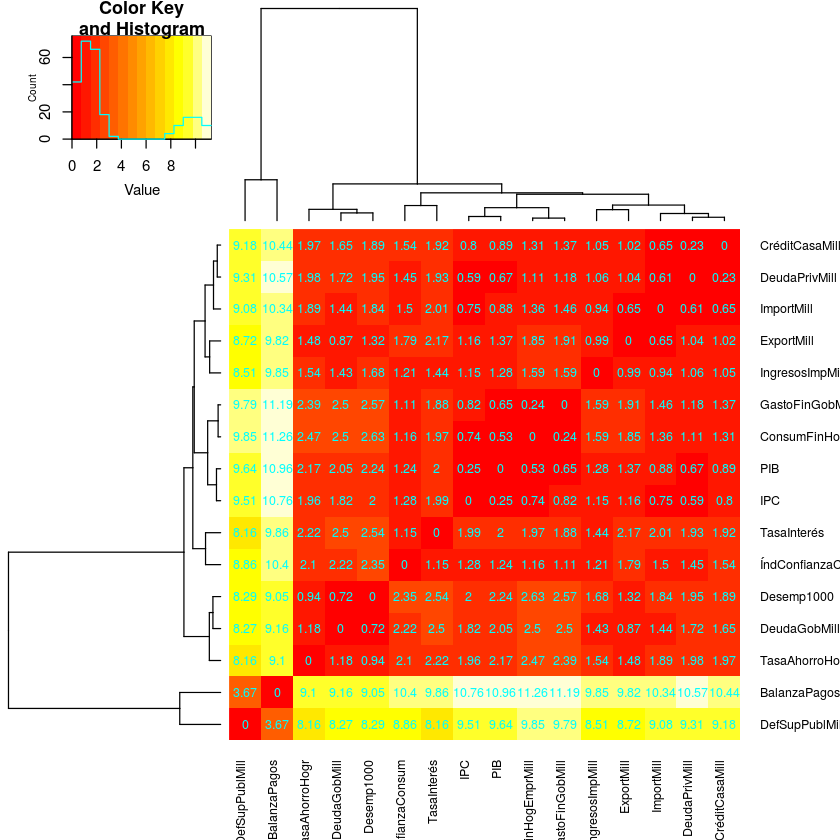

In [8]:
m<-as.matrix(deuc); heatmap.2(m, cellnote=round(m, digits=2), trace='none',
                              notecex = 0.75, cexRow = 0.75, cexCol = 0.75)

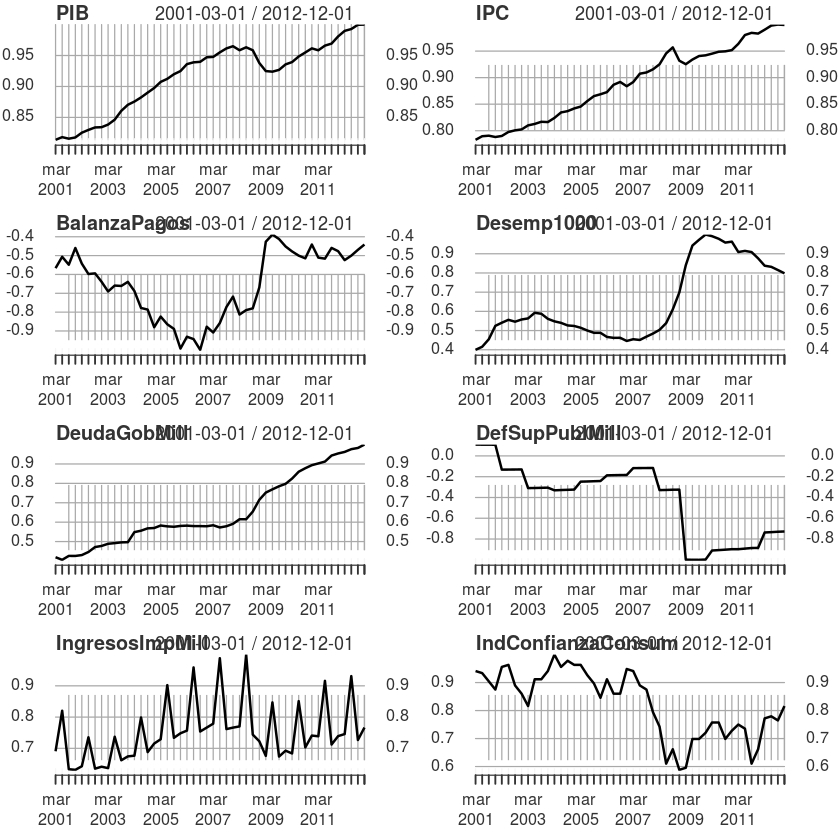

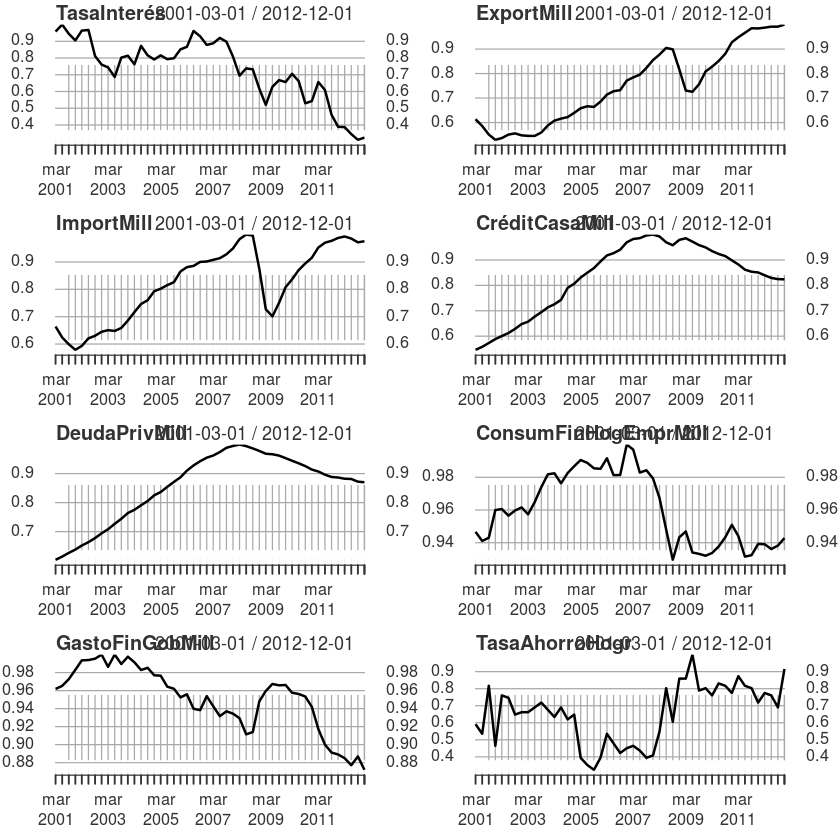

In [9]:
vars <- xts(dn, order.by=dates)
par(mfrow=c(4,2)) # Paneles en 4 filas 1 columna
for (i in 1:8) {
    print(plot(vars[,i], main = colnames(vars)[i]))
}
par(mfrow=c(4,2)) # Paneles en 4 filas 1 columna
for (i in 9:16) {
    print(plot(vars[,i], main = colnames(vars)[i]))
}

In [10]:
modelo1 <- lm(PIB ~ ., data=d)
summary(modelo1)


Call:
lm(formula = PIB ~ ., data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-92.498 -26.940   2.435  28.896  57.344 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.024e+04  3.706e+03  -2.763  0.00941 ** 
IPC                   1.166e+02  2.116e+01   5.509 4.51e-06 ***
BalanzaPagos          2.301e-03  1.734e-03   1.327  0.19393    
Desemp1000           -1.972e-02  8.392e-03  -2.350  0.02510 *  
DeudaGobMill          2.968e-05  2.826e-05   1.050  0.30150    
DefSupPublMill        3.652e-06  3.334e-04   0.011  0.99133    
IngresosImpMill       3.288e-04  4.359e-04   0.754  0.45614    
ÍndConfianzaConsum    1.887e+02  1.561e+02   1.208  0.23573    
TasaInterés           1.230e+01  3.074e+01   0.400  0.69173    
ExportMill           -2.658e-03  2.356e-03  -1.128  0.26765    
ImportMill            3.312e-03  1.978e-03   1.674  0.10379    
CréditCasaMill        2.814e-05  7.856e-05   0.358  0.72252    
DeudaPrivMill       

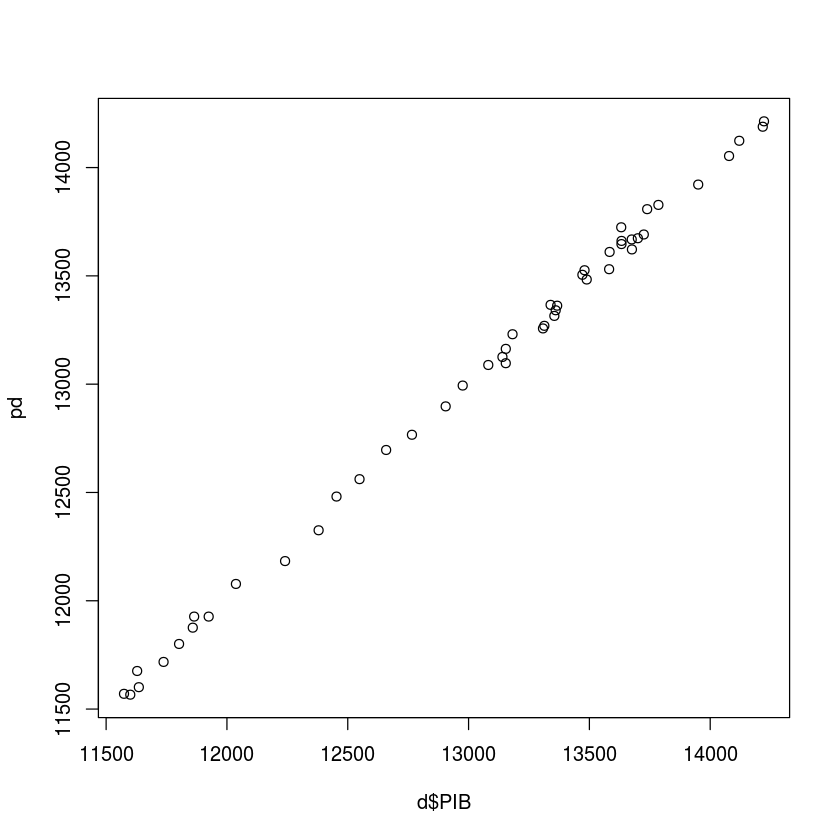

In [11]:
pd <- predict(modelo1, d)
plot(d$PIB, pd)

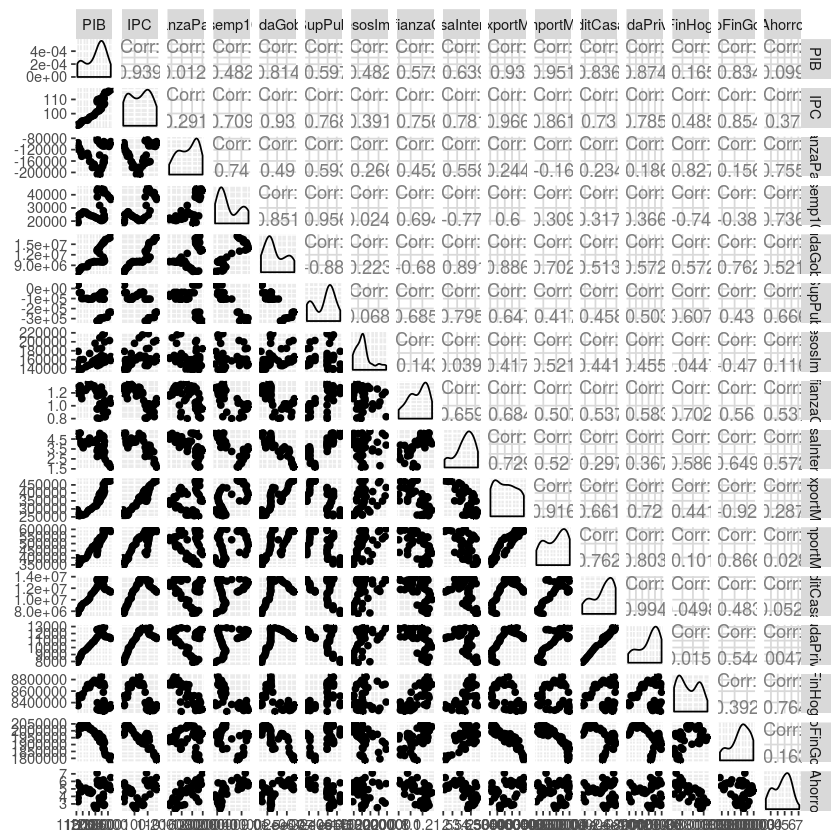

In [12]:
library(GGally)
ggpairs(d, lower = list(combo = wrap("facethist", binwidth = 0.2)))

Loading required package: lattice
Loading required package: ggplot2


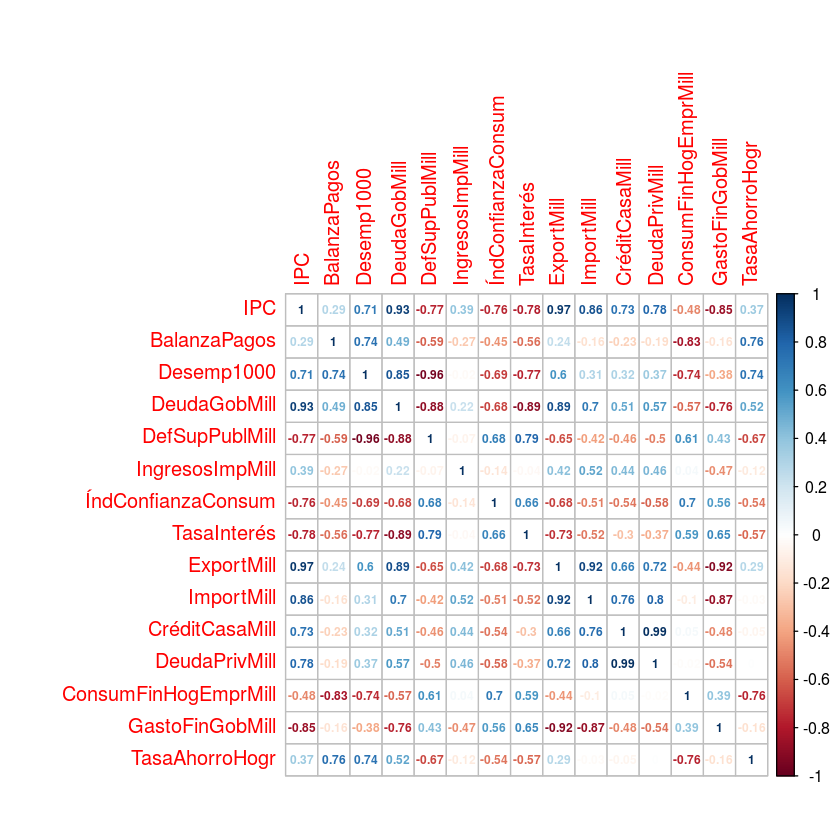

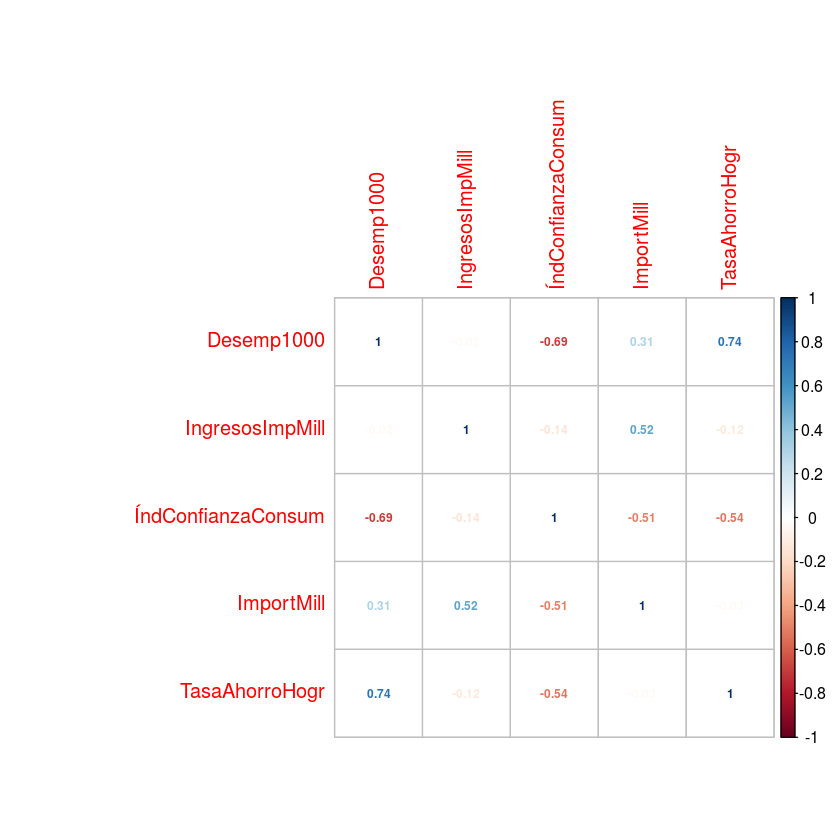

In [13]:
library('caret')

predictors = d[,2:16]
corr_pred = cor(predictors)
corrplot(corr_pred, method="number", number.cex=0.6)

hc = findCorrelation(corr_pred, cutoff=0.75)

hc = sort(hc)
reduced_pred = predictors[,-c(hc)]

corrplot(corr_pred[-hc,-hc], method="number", number.cex=0.6)

Desemp1000,IngresosImpMill,ÍndConfianzaConsum,ImportMill,TasaAhorroHogr,PIB
18253,150488.6,1.28,399990.9,4.2,11573.99
18981,178740.1,1.27,375928.8,3.8,11635.41
20767,137987.5,1.23,360878.5,5.8,11599.99
23955,137549.8,1.19,348669.0,3.3,11628.45
24701,140019.7,1.30,357303.4,5.4,11737.73
25391,160236.9,1.31,373914.7,5.3,11801.89


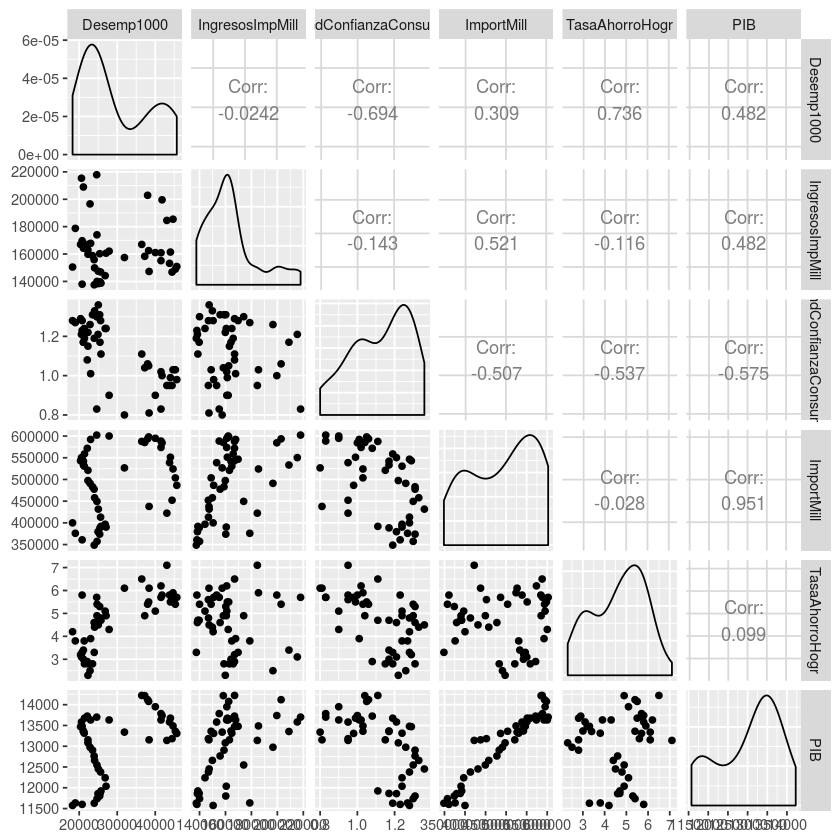

In [14]:
reduced_Data = reduced_pred

reduced_Data$PIB = d$PIB

head(reduced_Data)

ggpairs(reduced_Data, lower = list(combo = wrap("facethist", binwidth = 0.2)))

In [15]:
modelo2 <- lm(PIB ~ ., data=reduced_Data)
summary(modelo2)


Call:
lm(formula = PIB ~ ., data = reduced_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-410.82 -113.63   -1.89  121.68  493.74 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)         7.981e+03  5.942e+02  13.432  < 2e-16 ***
Desemp1000          2.562e-02  5.693e-03   4.500  5.3e-05 ***
IngresosImpMill     1.607e-03  1.690e-03   0.951    0.347    
ÍndConfianzaConsum  1.258e+02  2.854e+02   0.441    0.662    
ImportMill          8.340e-03  5.324e-04  15.664  < 2e-16 ***
TasaAhorroHogr     -4.824e+01  3.939e+01  -1.225    0.228    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 193.8 on 42 degrees of freedom
Multiple R-squared:  0.947,	Adjusted R-squared:  0.9407 
F-statistic: 150.2 on 5 and 42 DF,  p-value: < 2.2e-16


In [16]:
library(MASS)

step <- stepAIC(modelo2, direction="both")
summary(step)

Start:  AIC=511.22
PIB ~ Desemp1000 + IngresosImpMill + ÍndConfianzaConsum + ImportMill + 
    TasaAhorroHogr

                     Df Sum of Sq      RSS    AIC
- ÍndConfianzaConsum  1      7300  1585237 509.44
- IngresosImpMill     1     33949  1611886 510.24
- TasaAhorroHogr      1     56339  1634275 510.90
<none>                             1577936 511.22
- Desemp1000          1    760754  2338690 528.11
- ImportMill          1   9217982 10795918 601.53

Step:  AIC=509.44
PIB ~ Desemp1000 + IngresosImpMill + ImportMill + TasaAhorroHogr

                     Df Sum of Sq      RSS    AIC
- IngresosImpMill     1     35585  1620822 508.51
<none>                             1585237 509.44
- TasaAhorroHogr      1     73395  1658631 509.61
+ ÍndConfianzaConsum  1      7300  1577936 511.22
- Desemp1000          1    790591  2375827 526.86
- ImportMill          1  11209227 12794464 607.68

Step:  AIC=508.51
PIB ~ Desemp1000 + ImportMill + TasaAhorroHogr

                     Df Sum of Sq    


Call:
lm(formula = PIB ~ Desemp1000 + ImportMill, data = reduced_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.76 -120.66  -17.55  119.82  478.54 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.202e+03  1.787e+02  45.884  < 2e-16 ***
Desemp1000  1.828e-02  3.283e-03   5.568 1.36e-06 ***
ImportMill  8.696e-03  3.655e-04  23.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 193.5 on 45 degrees of freedom
Multiple R-squared:  0.9434,	Adjusted R-squared:  0.9409 
F-statistic: 375.3 on 2 and 45 DF,  p-value: < 2.2e-16


In [17]:
modelo3 <- lm(formula = PIB ~ Desemp1000 + ImportMill, data = reduced_Data)
summary(modelo3)


Call:
lm(formula = PIB ~ Desemp1000 + ImportMill, data = reduced_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-439.76 -120.66  -17.55  119.82  478.54 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.202e+03  1.787e+02  45.884  < 2e-16 ***
Desemp1000  1.828e-02  3.283e-03   5.568 1.36e-06 ***
ImportMill  8.696e-03  3.655e-04  23.792  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 193.5 on 45 degrees of freedom
Multiple R-squared:  0.9434,	Adjusted R-squared:  0.9409 
F-statistic: 375.3 on 2 and 45 DF,  p-value: < 2.2e-16


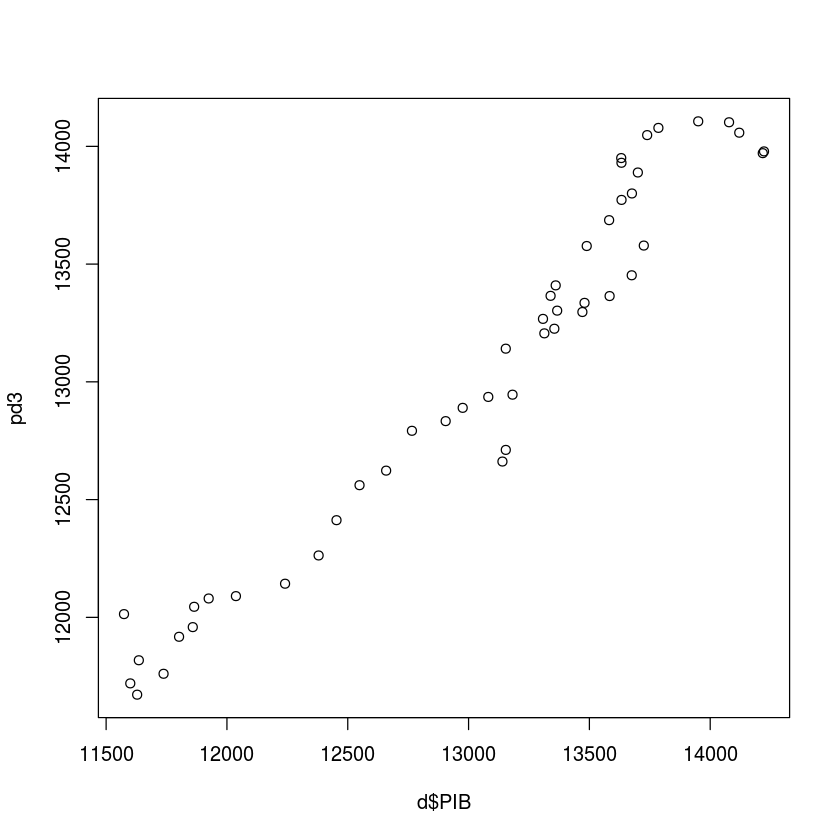

In [18]:
pd3 <- predict(modelo3, d)
plot(d$PIB, pd3)

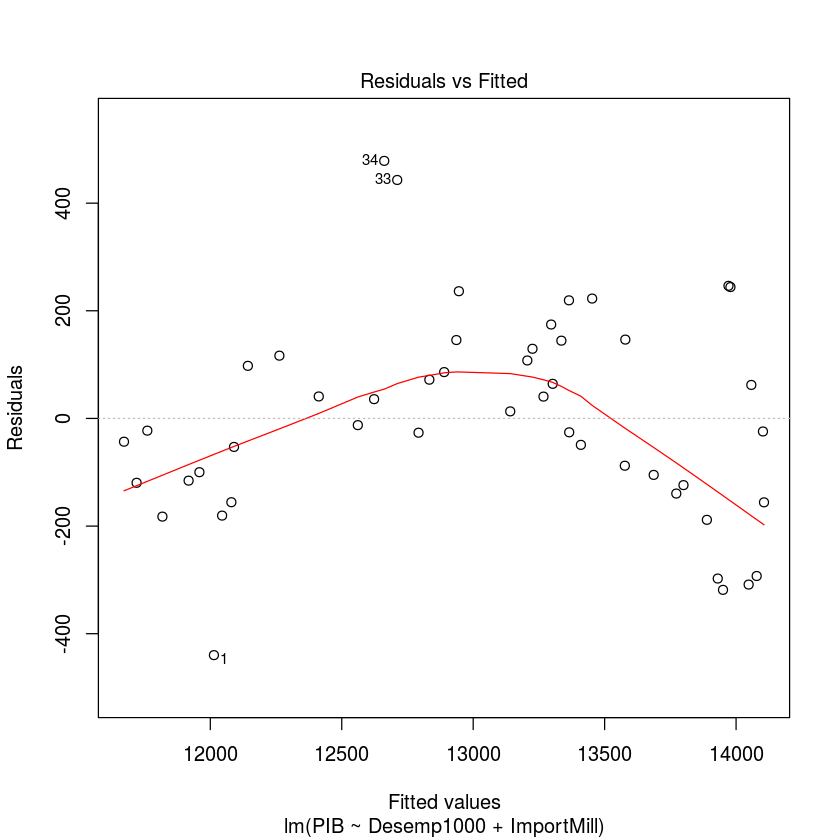

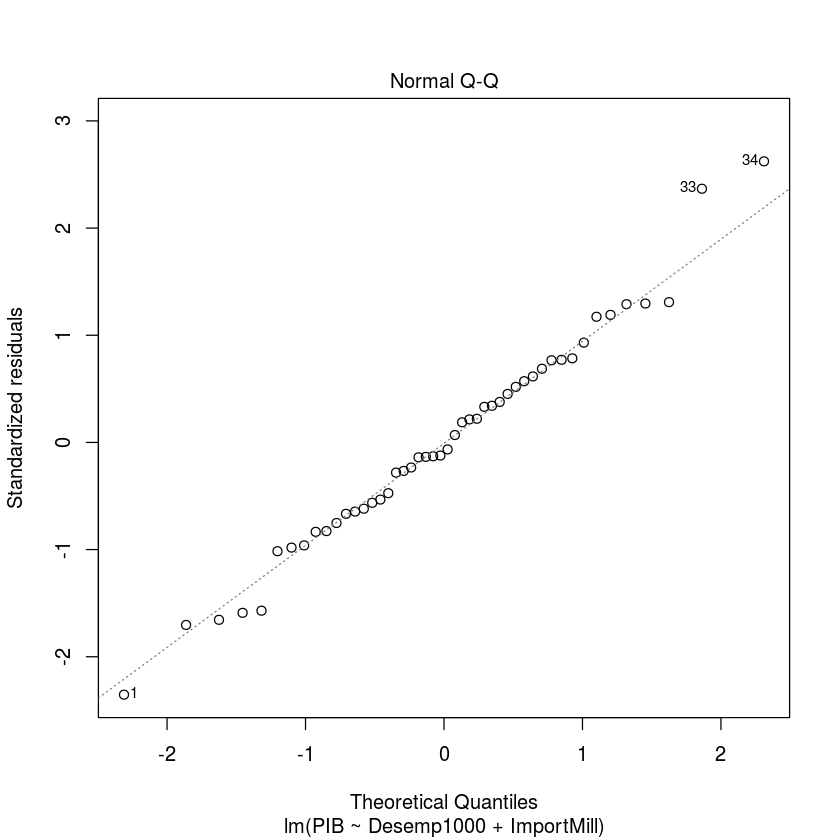

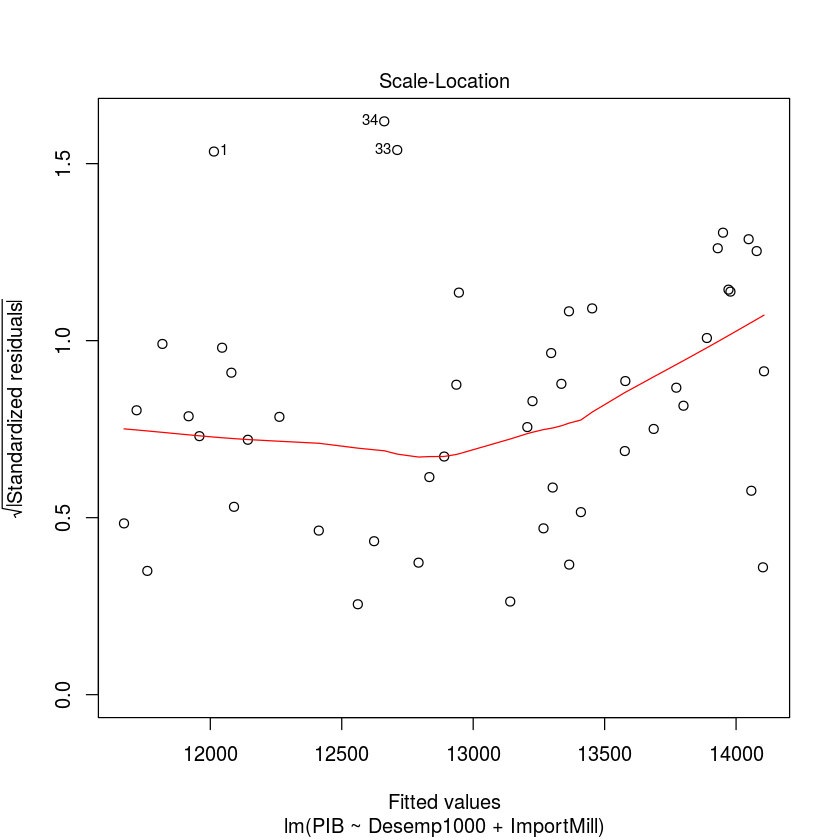

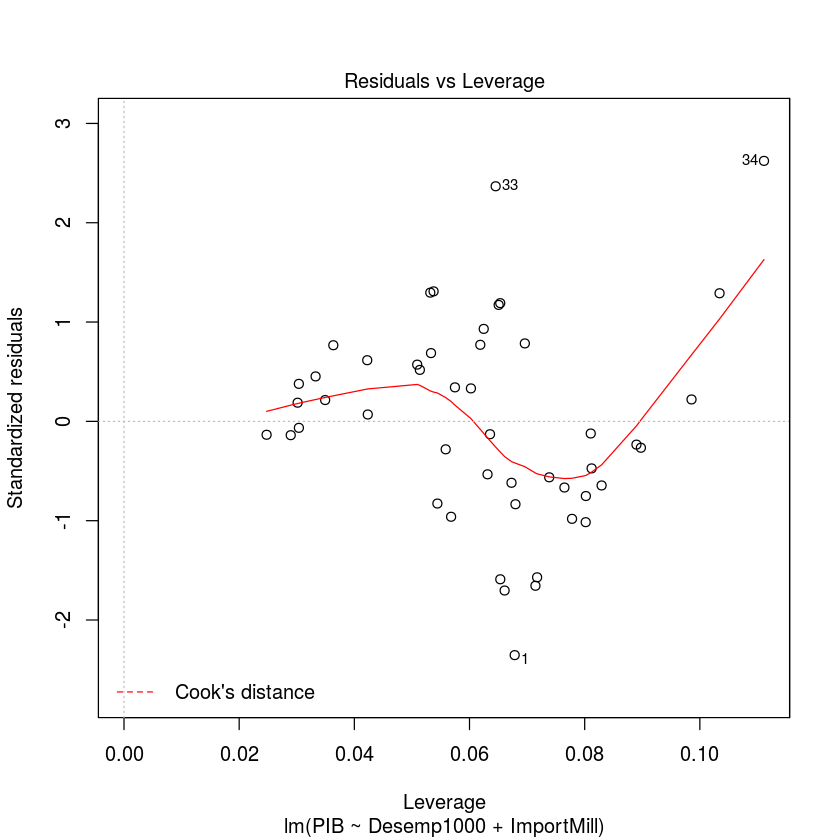

In [19]:
plot(modelo3)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



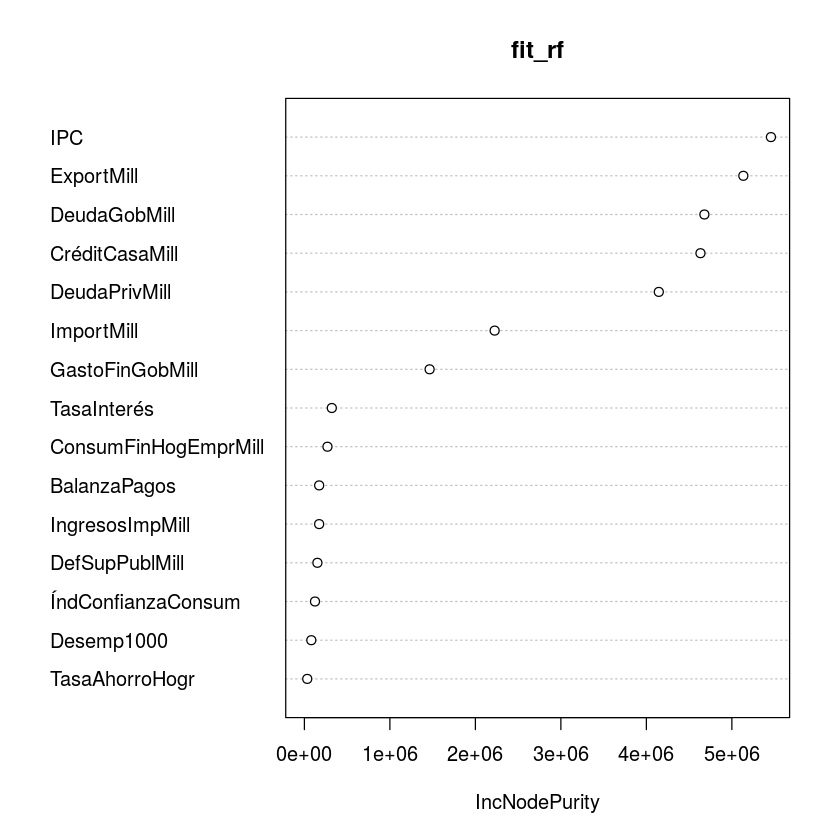

In [20]:
library(randomForest)

fit_rf <- randomForest(PIB~., data=d)
varImpPlot(fit_rf,type=2)

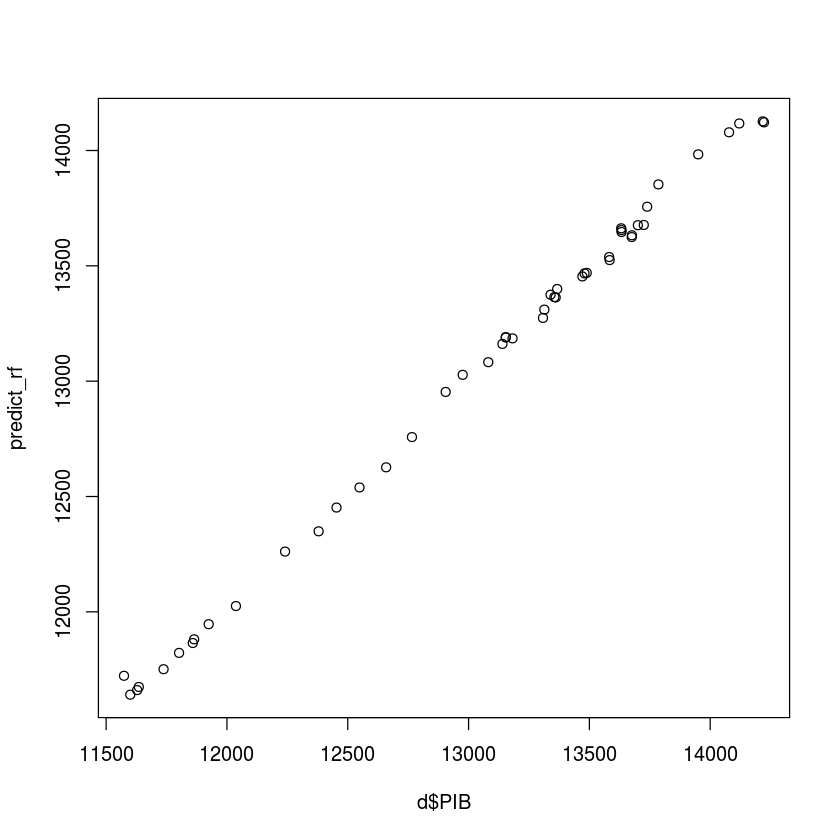

In [21]:
predict_rf <- predict(fit_rf, d)
plot(d$PIB, predict_rf)

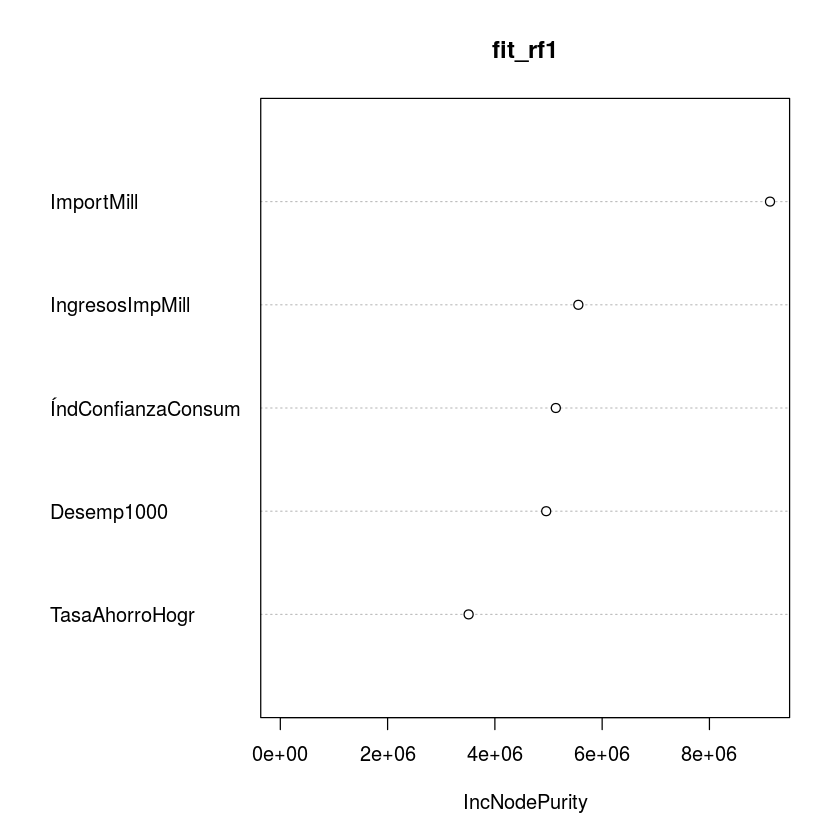

In [22]:
fit_rf1 <- randomForest(PIB~., data=reduced_Data)
varImpPlot(fit_rf1,type=2)

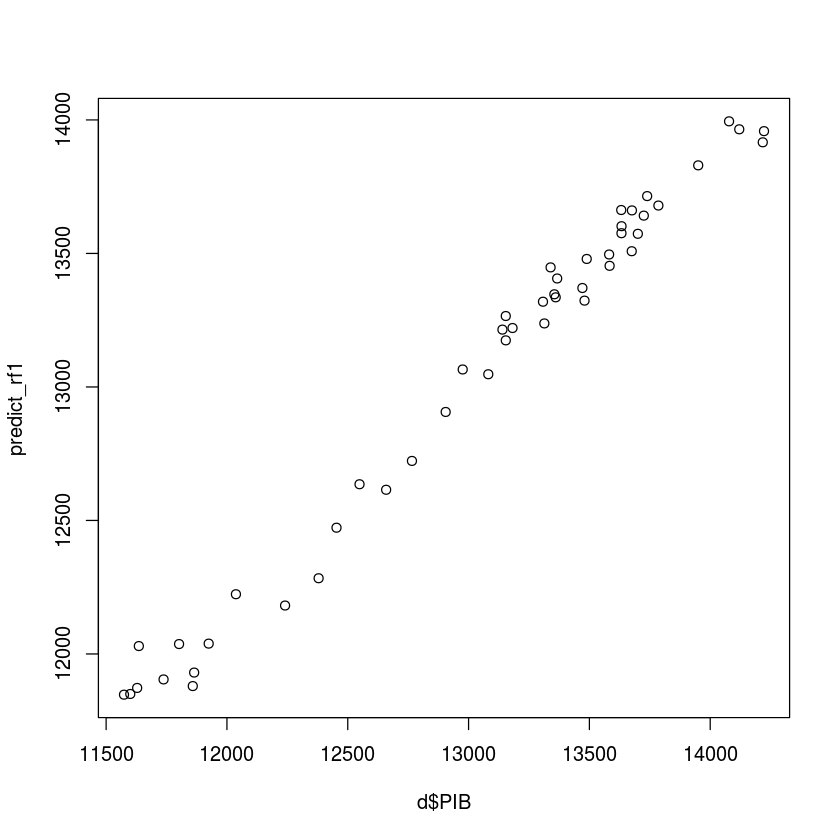

In [23]:
predict_rf1 <- predict(fit_rf1, d)
plot(d$PIB, predict_rf1)